In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

#### Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [98]:
def mserror(X, w, y_pred, lambda_=0):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)+ lambda_*np.sum(w**2)

In [2]:
data, target, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [20]:
coef

array([62.6735955, 68.0472182])

Масштабирование признаков

In [ ]:
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)

for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

Функция градиентного спуска

In [96]:
def gd(data, target, w, eta, max_iter, min_weight_dist, lambda_=0):
    # список векторов весов после каждой итерации
    w_list = [w.copy()]
    errors = []

    # счетчик итераций
    iter_num = 0
    weight_dist = np.inf

    # ход градиентного спуска
    while weight_dist > min_weight_dist and iter_num < max_iter:
        new_w = w - 2 * eta * np.dot(data.T, (np.dot(data, w) - target)) / target.shape[0]
        weight_dist = np.linalg.norm(new_w - w, ord=2)

        w_list.append(new_w.copy())
        errors.append(mserror(data, new_w, target, lambda_))

        iter_num += 1
        w = new_w

    w_list = np.array(w_list)

    return errors, w_list 

Функция стахостического градиентного спуска

In [97]:
def s_gd (data, target, w, eta, max_iter, min_weight_dist, lambda_=0):

    w = np.zeros(2)
    w_list = [w.copy()]
    errors = []
    # зададим начальную разницу весов большим числом
    weight_dist = np.inf
    # счетчик итераций
    iter_num = 0
    np.random.seed(1234)

    # ход градиентного спуска
    while weight_dist > min_weight_dist and iter_num < max_iter:

        # генерируем случайный индекс объекта выборки
        train_ind = np.random.randint(data.shape[0])

        new_w = w - 2 * eta * np.dot(data[train_ind].T, 
                                     (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]

        weight_dist = np.linalg.norm(new_w - w, ord=2)

        w_list.append(new_w.copy())
        errors.append(mserror(data, new_w, target, lambda_))

        iter_num += 1
        w = new_w

    w_list = np.array(w_list)

    return errors, w_list 

Зададим параметры для моделей и начальный вектор весов

In [80]:
w = np.zeros(2)
# шаг градиентного спуска
eta = 0.1

# максимальное число итераций
max_iter = 1e6

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

Произведем расчет двумя методами

In [104]:
#результат, полученный методом градиентного спуска
gd_errors,  gd_w_list=  gd (data, target, w, eta, max_iter, min_weight_dist)

In [105]:
#результат, полученный методом стохастического градиентного спуска
s_gd_errors, s_gd_w_list = s_gd (data, target, w, eta, max_iter, min_weight_dist)

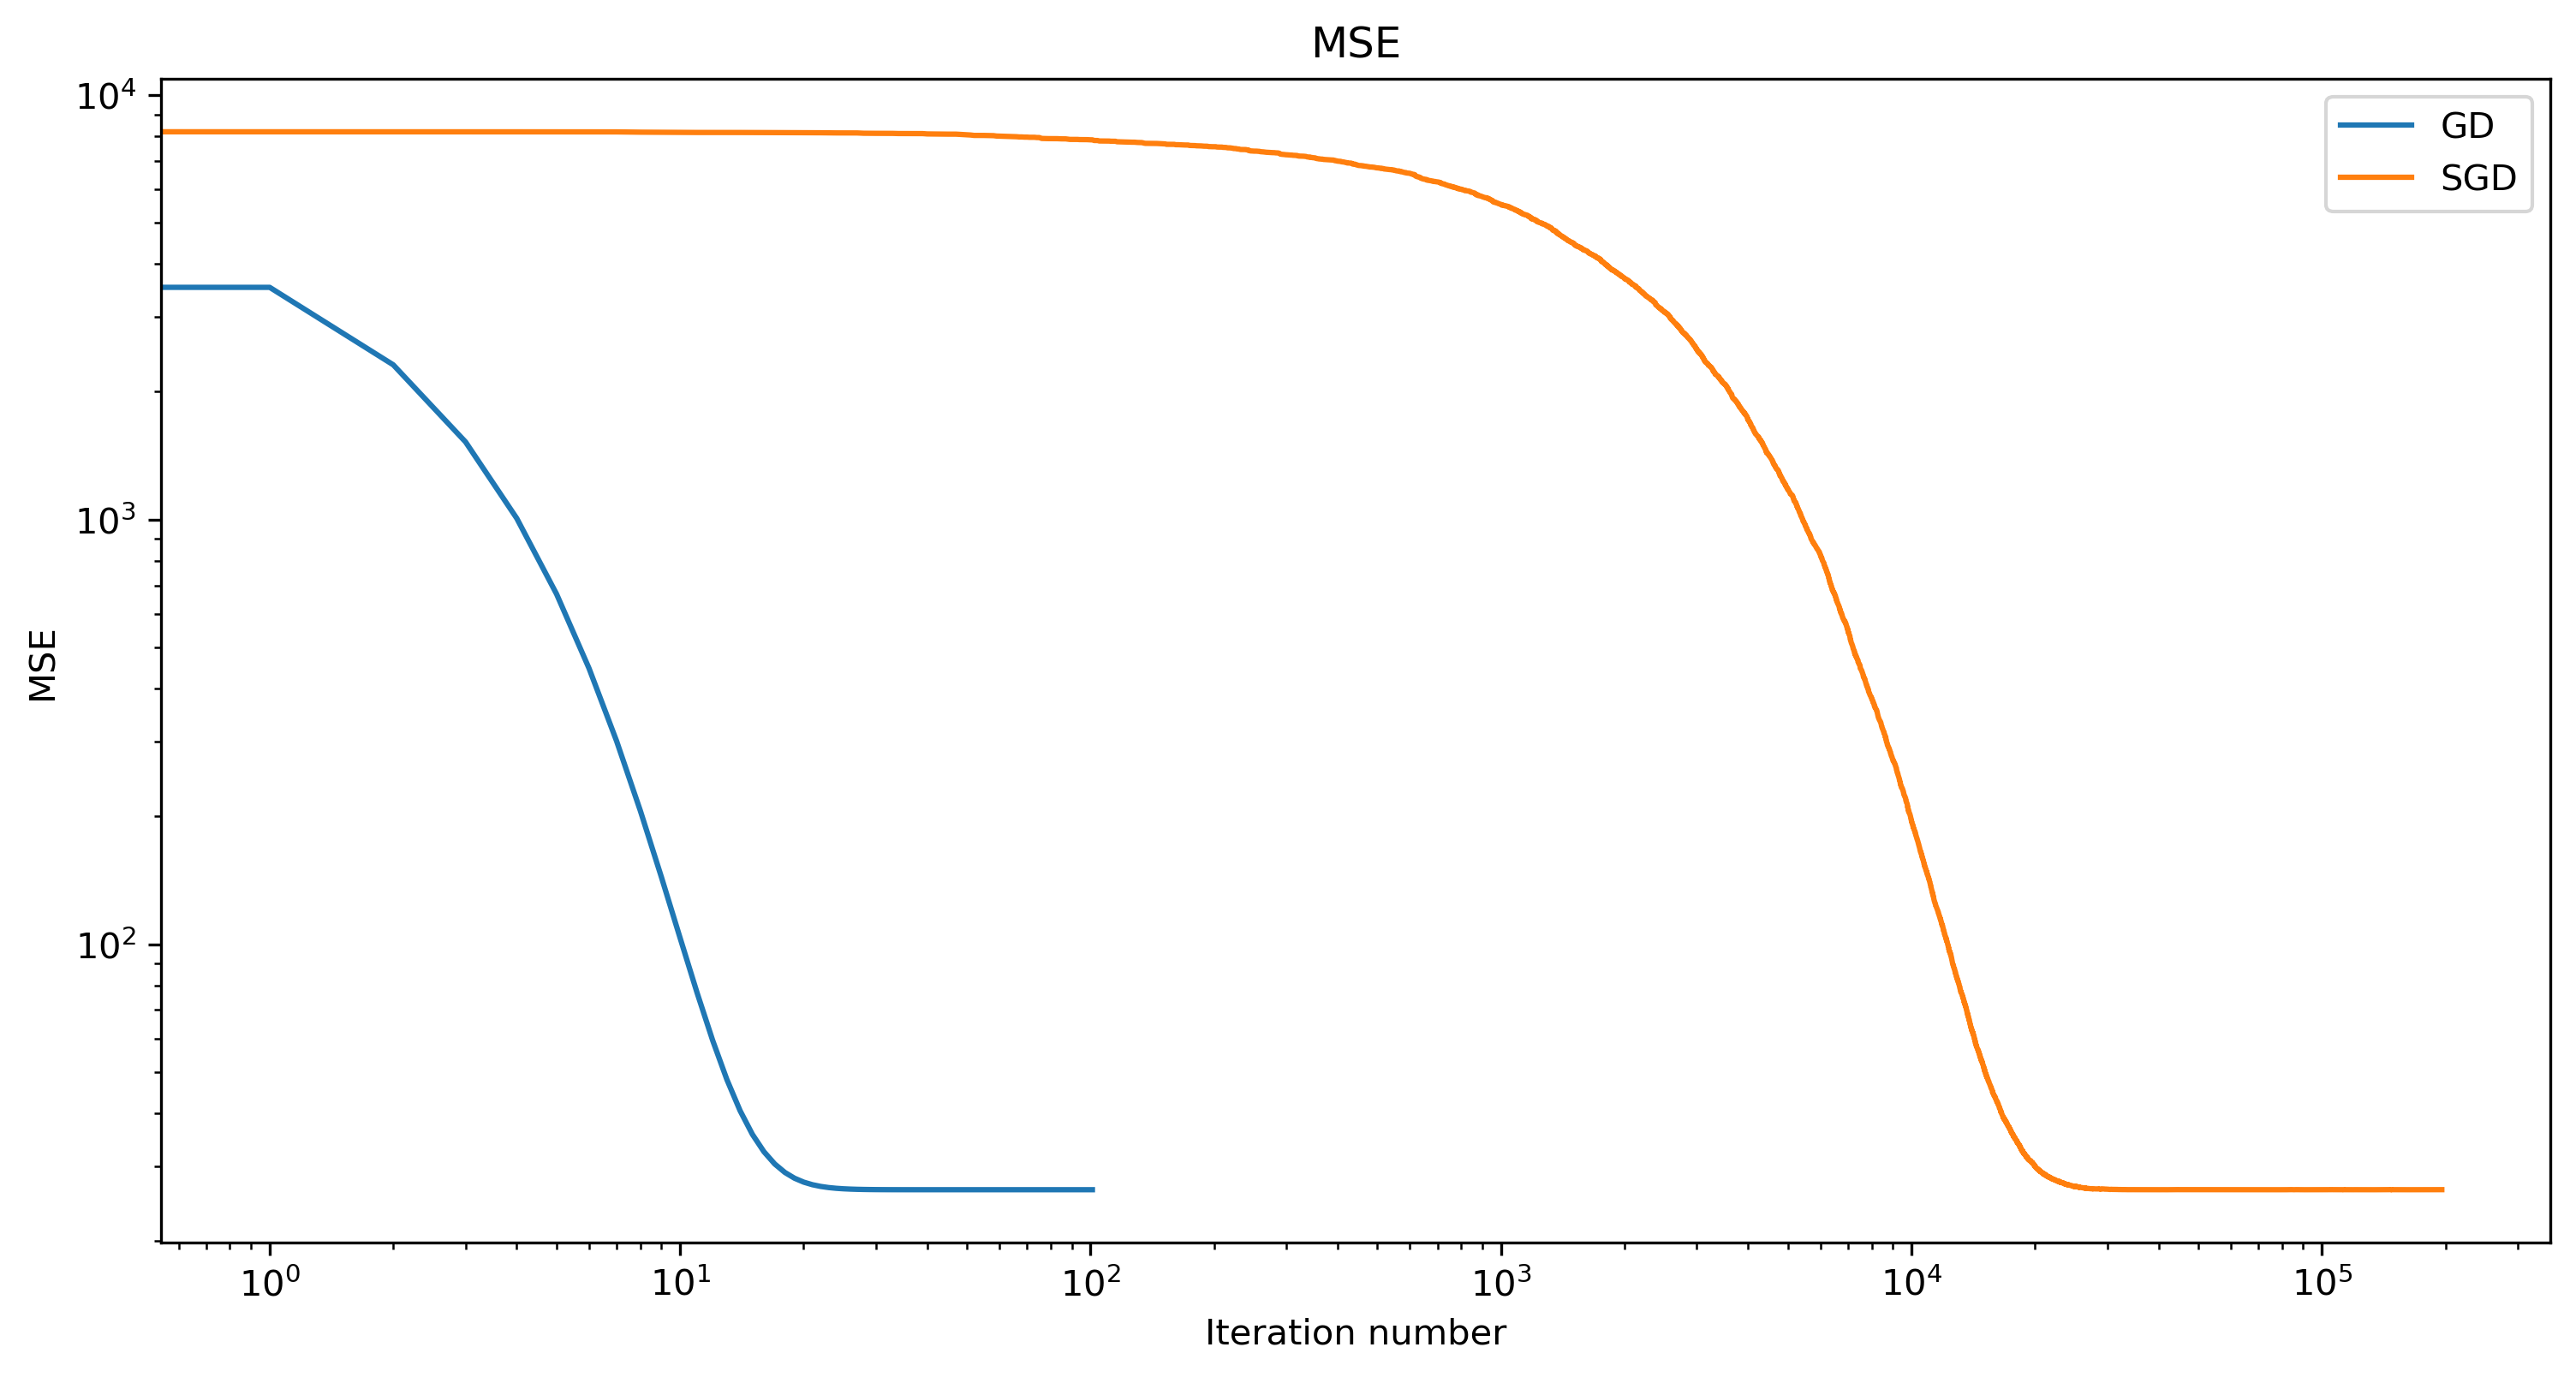

In [83]:
# Визуализируем изменение функционала ошибки
fig, axes = plt.subplots(figsize=(12,6), dpi=300)
plt.plot(range(len(gd_errors)), gd_errors, label="GD")
plt.plot(range(len(s_gd_errors)), s_gd_errors, label="SGD")
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.yscale(value="log")
plt.xscale(value="log")
plt.legend(loc="best")

plt.show()

Вывод:скорость сходимости при обычном градиентном спуске гораздо выше, чем при стахостическом. 

#### Модифицировать решение первого задания путем добавления  L2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

запишем функцию рассчета MSE в следующем виде, где lambda_ - коэфициент регуляризации, по умолчанию =0

In [92]:
#def mserror(X, w, y_pred, lambda=0):
    #y = X.dot(w)
    #return (sum((y - y_pred)**2)) / len(y) + lambda_*np.sum(w**2)

In [88]:
переобучим модели с регуляризацией

In [101]:
#результат, полученный методом градиентного спуска c L2 - регуляризацией
gd_l2_errors,  gd_l2_w_list=  gd (data, target, w, eta, max_iter, min_weight_dist, lambda_=1e-8)

In [102]:
#результат, полученный методом стохастического градиентного спуска c L2 - регуляризацией
s_gd_l2_errors, s_gd_l2_w_list = s_gd (data, target, w, eta, max_iter, min_weight_dist, lambda_=1e-8)

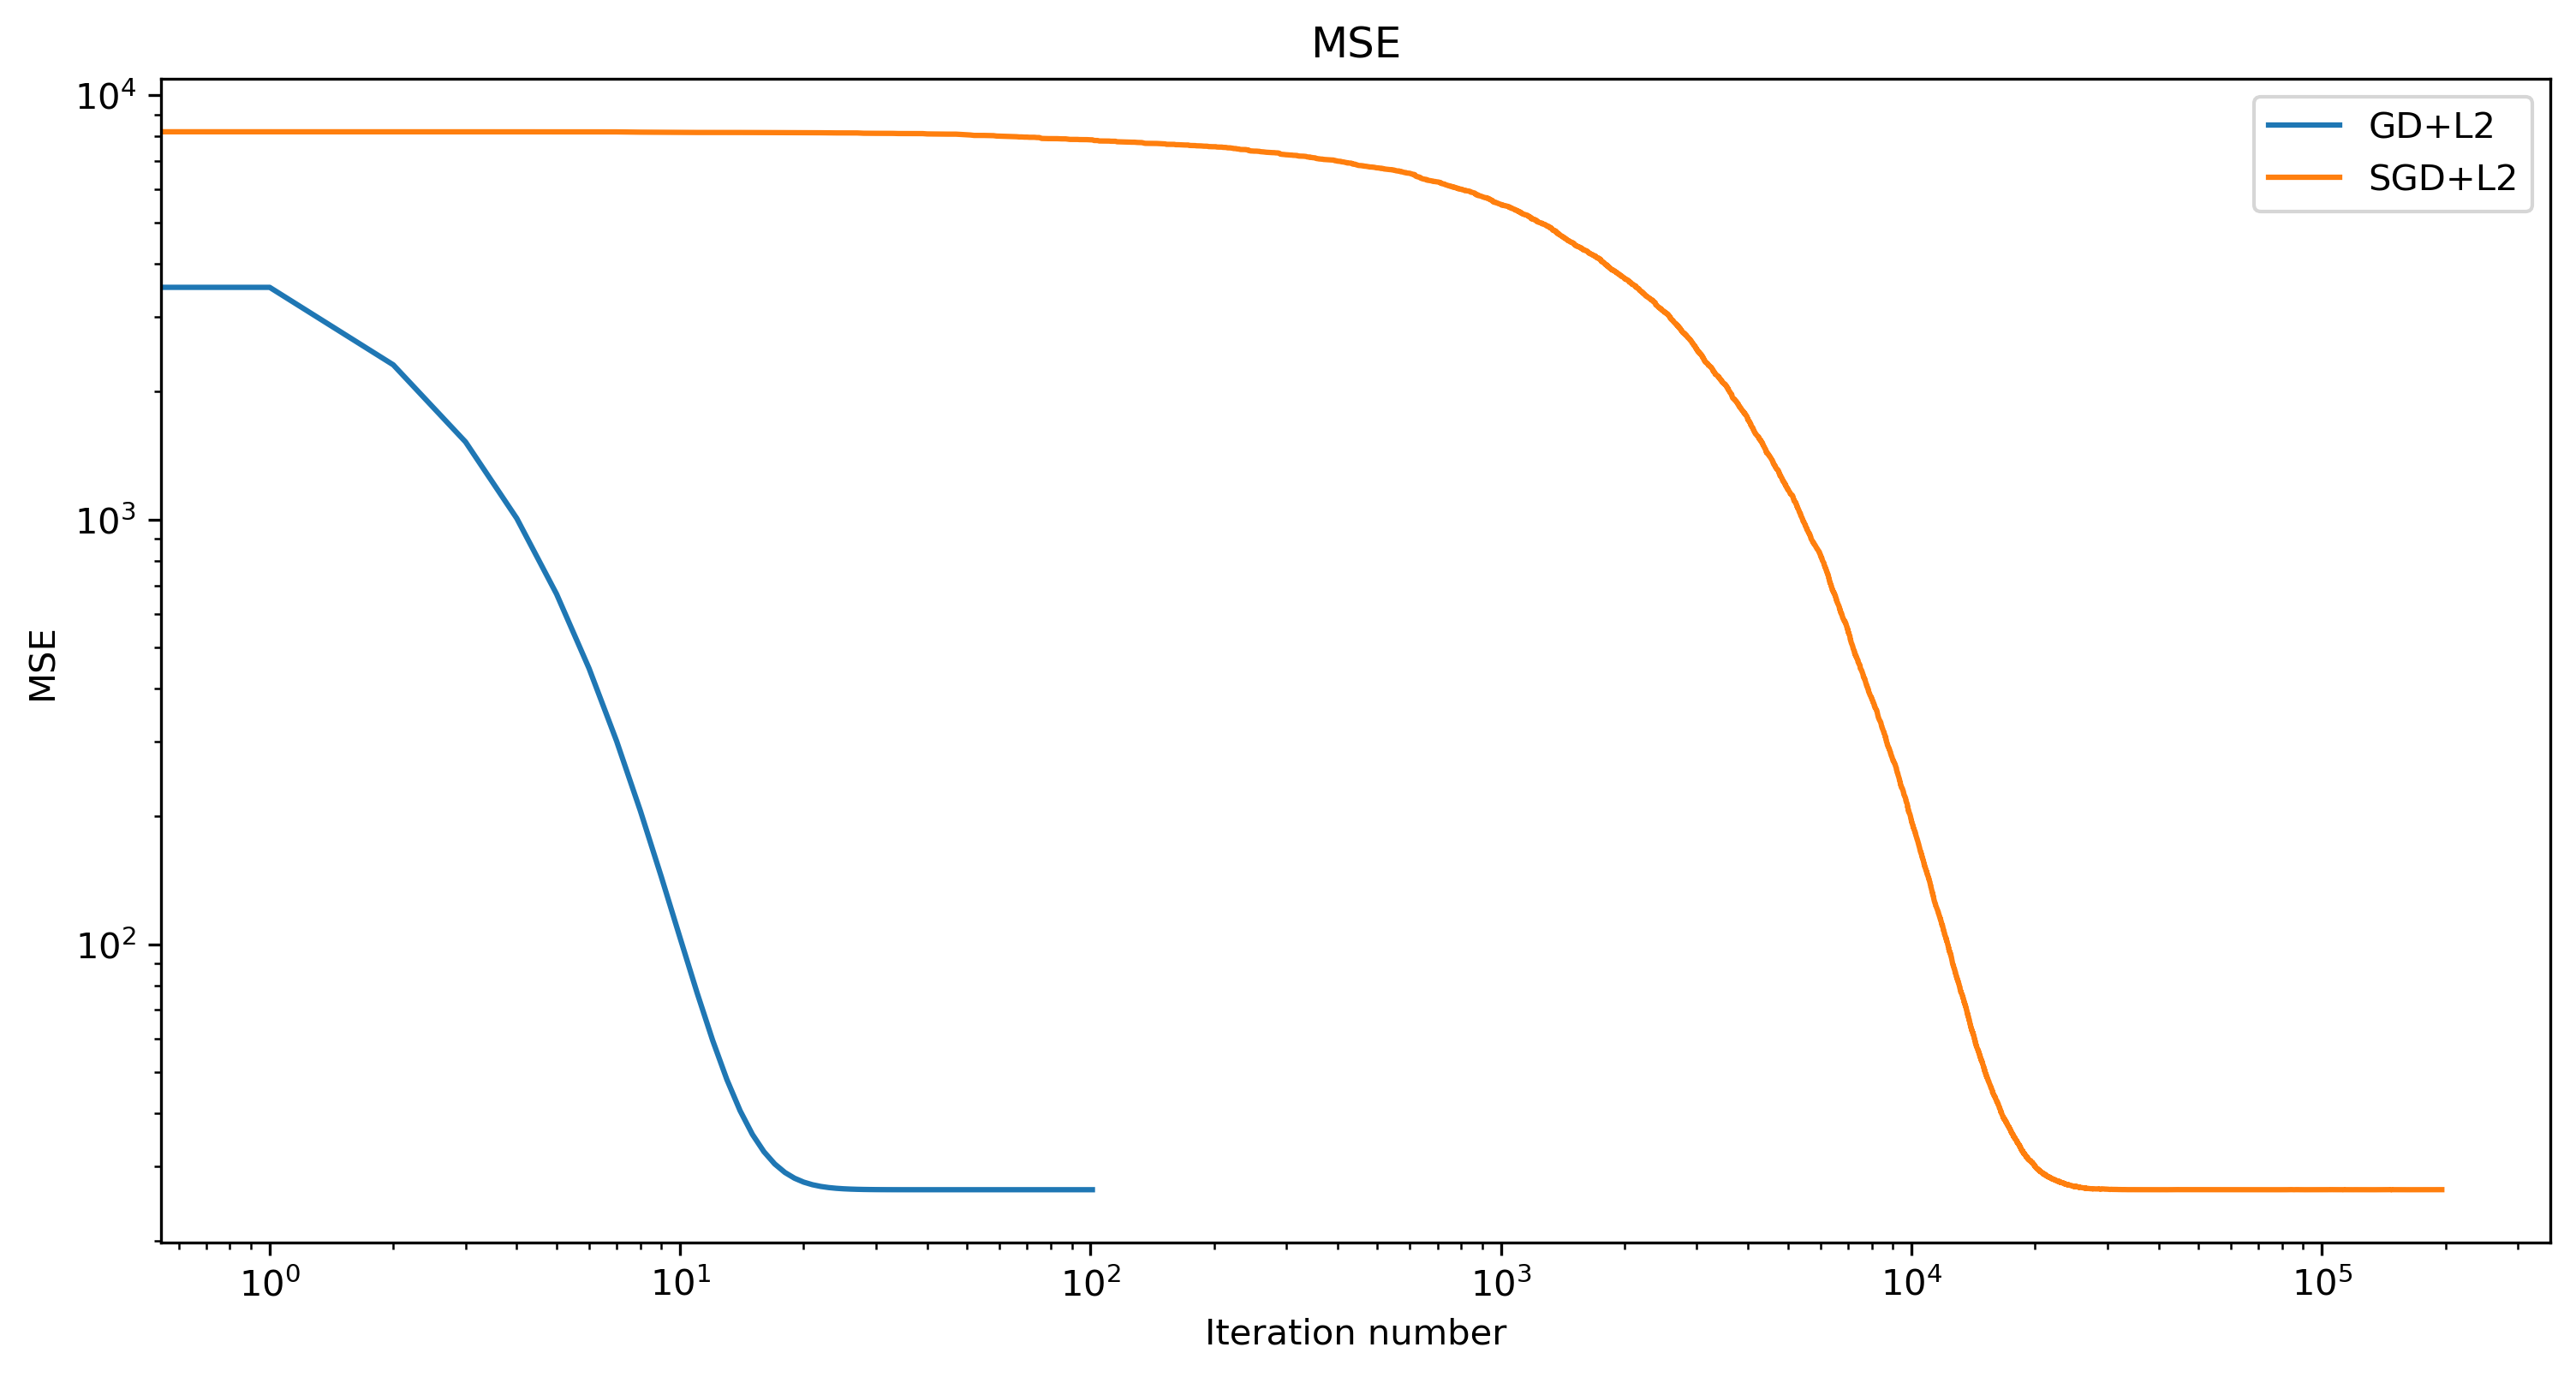

In [103]:
# Визуализируем изменение функционала ошибки
fig, axes = plt.subplots(figsize=(12,6), dpi=300)
plt.plot(range(len(gd_l2_errors)), gd_l2_errors, label="GD+L2")
plt.plot(range(len(s_gd_l2_errors)), s_gd_l2_errors, label="SGD+L2")
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.yscale(value="log")
plt.xscale(value="log")
plt.legend(loc="best")

plt.show()